# Data Preparation

## Goals

1. Identify and extract data from key columns and create a new dataset.
2. Create a balanced dataset from the new dataset with an equal number of real and fake job postings.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

dataset = pd.read_csv("data/fake_job_postings.csv")
dataset.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [2]:
# Fill NaN data with space
dataset.fillna(" ", inplace=True)
dataset.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
# Create new column with all the text information
dataset["text"] = dataset["title"] + " " + dataset["location"] + " " + dataset["department"] + " " + dataset["company_profile"] + " " + dataset["description"] + " " + dataset["requirements"] + " " + dataset["benefits"] + " " + dataset["employment_type"] + " " + dataset["required_education"] + " " + dataset["industry"] + " " + dataset["function"]
dataset["text"][0]

"Marketing Intern US, NY, New York Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food communi

In [4]:
# Delete the textual columns
del dataset['title']
del dataset['location']
del dataset['department']
del dataset['company_profile']
del dataset['description']
del dataset['requirements']
del dataset['benefits']
del dataset['employment_type']
del dataset['required_experience']
del dataset['required_education']
del dataset['industry']
del dataset['function']
dataset.head()

,job_id,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,text
0,1,,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,2,,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,3,,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,4,,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,5,,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


<AxesSubplot: xlabel='fraudulent', ylabel='count'>

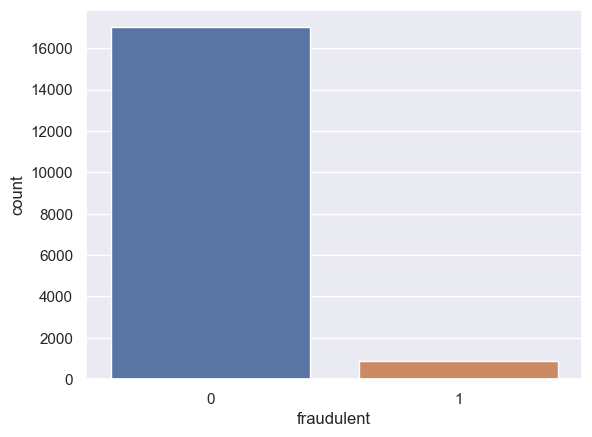

In [5]:
# Count plot of fake/real job postings
sb.countplot(x="fraudulent", data=dataset)

In [6]:
# Exact number of real/fake job postings
counts = dataset["fraudulent"].value_counts()
dataset.to_csv("data/imbalanced_job_data.csv", index=False)
counts

0    17014
1      866
Name: fraudulent, dtype: int64

The dataset has 17,014 real job postings and 866 fraudulent job postings. The dataset is **highly imbalanced**. Therefore, we will create a new dataset with 866 real job postings and 866 fraudulent job postings.

In [7]:
# Use boolean indexing to extract all the real/fake job postings
real_jobs = dataset[dataset["fraudulent"] == 0]
fake_jobs = dataset[dataset["fraudulent"] == 1]
real_jobs

,job_id,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,text
0,1,,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,2,,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,3,,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,4,,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,5,,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."
...,...,...,...,...,...,...,...
17875,17876,,0,1,1,0,"Account Director - Distribution CA, ON, Toron..."
17876,17877,,0,1,1,0,"Payroll Accountant US, PA, Philadelphia Accoun..."
17877,17878,,0,0,0,0,Project Cost Control Staff Engineer - Cost Con...
17878,17879,,0,0,1,0,"Graphic Designer NG, LA, Lagos Nemsia Stud..."


In [8]:
# Shuffle the real and fake job posting data points
real_jobs = real_jobs.sample(frac=1).reset_index(drop=True)
fake_jobs = fake_jobs.sample(frac=1).reset_index(drop=True)
real_jobs = real_jobs.iloc[:866]
real_jobs

,job_id,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,text
0,3131,,0,1,1,0,Jr. Front-End Developer & Graphic Design Inter...
1,11717,,0,1,0,0,"Delivery Services Manager US, NE, Omaha ABC ..."
2,11656,,0,1,0,0,"iOS Developer US, CA, San Mateo Tile is one ..."
3,5353,,0,1,1,0,"Network Systems Engineer GB, BKM, Bletchley ..."
4,6307,,0,1,0,0,"Collections Supervisor US, VA, Virginia Beach ..."
...,...,...,...,...,...,...,...
861,15504,,0,1,1,0,"Senior AR Associate IN, TN, Chennai AR Establi..."
862,8243,,0,1,0,0,Sr. Active Directory and Identity Management p...
863,3156,35000-55000,0,1,1,0,"MobileApp-Entwickler DE, BY, München tech he..."
864,11990,24000-36000,0,1,0,0,"Residential Manager US, OH, Ravenna ICF Commit..."


In [9]:
# Combine the real/fake job postings
clean_dataset = pd.concat([real_jobs, fake_jobs], axis=0)
# View the split details
print("{}".format(clean_dataset["fraudulent"].value_counts()))

0    866
1    866
Name: fraudulent, dtype: int64


In [10]:
# Shuffle and save the train and test dataframes as CSV
clean_dataset  = clean_dataset.sample(frac=1).reset_index(drop=True)
clean_dataset.to_csv("data/job_data.csv", index=False)